##### Import Libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

##### Load Data

In [109]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Cleaing

In [110]:
# Fill missing value of column Age with mean()
mean_value_age = data["Age"].mean()
data.loc[: , "Age"] = data["Age"].fillna(mean_value_age)

# Fill missing value of column Embarked with mode()

data.loc[:, "Embarked"] = data["Embarked"].mode()[0]

# Drop the Cabin column due to they missing too much value
data.drop("Cabin", axis=1, inplace=True)

# Replace male/female to 0/1

data["Sex"].replace({'male': 1, 'female': 0}, inplace=True)

/var/folders/yp/p0rxrtbd00d84qq4vdm84d5r0000gn/T/ipykernel_4387/4148387780.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Sex"].replace({'male': 1, 'female': 0}, inplace=True)
/var/folders/yp/p0rxrtbd00d84qq4vdm84d5r0000gn/T/ipykernel_4387/4148387780.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

##### Exploratory Data Analysis (EDA)

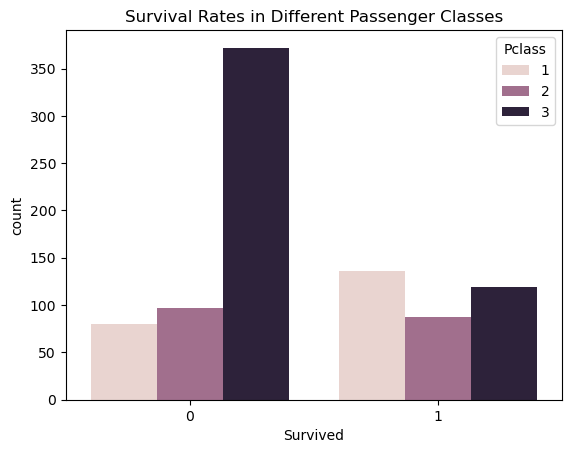

In [111]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival Rates in Different Passenger Classes')
plt.show()

##### Feature Engineering

In [112]:
# Creating a FamilySize feature
data["familySize"] = data["SibSp"] + data["Parch"] + 1

# Converting categorical variables to dummy variables
embarked_dummies = pd.get_dummies(data['Embarked'], drop_first=True)
class_dummies = pd.get_dummies(data['Pclass'], prefix='Class', drop_first=True)

# Adding dummy variables to the dataset
data = pd.concat([data, embarked_dummies, class_dummies], axis=1)

# Dropping columns not needed for the model
data.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Pclass'], axis=1, inplace=True)

data.head()



,Survived,Sex,Age,SibSp,Parch,Fare,familySize,Class_2,Class_3
0,0,1,22.0,1,0,7.2500,2,False,True
1,1,0,38.0,1,0,71.2833,2,False,False
2,1,0,26.0,0,0,7.9250,1,False,True
3,1,0,35.0,1,0,53.1000,2,False,False
4,0,1,35.0,0,0,8.0500,1,False,True


##### Model Selection

In [113]:
# Defining the features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 ##### Training the Model

In [114]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Get the coefficients from the model
coefficients = pd.DataFrame(model.coef_[0], index=X_train.columns, columns=['Coefficient'])
print(coefficients)

            Coefficient
Sex           -2.593924
Age           -0.029643
SibSp         -0.161211
Parch          0.006650
Fare           0.005068
familySize    -0.156310
Class_2       -0.448624
Class_3       -1.590498


##### Evaluation

In [115]:
# Predicting test set results
predictions = model.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

[[92 13]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.8044692737430168


##### Interpretation

In [116]:
# Getting the coefficients of the features
feature_importance = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)
print(feature_importance)

            Coefficient
Parch          0.006650
Fare           0.005068
Age           -0.029643
familySize    -0.156310
SibSp         -0.161211
Class_2       -0.448624
Class_3       -1.590498
Sex           -2.593924
